In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.fbp import fbp

In [3]:
Nx = 301
Ny = 311
Na = 401
Np = 501

In [4]:
axis_x = RegularAxis.linspace(-1, 1, Nx)
axis_y = RegularAxis.linspace(-1, 1, Ny)
#axis_t = RegularAxis.linspace(-np.sqrt(2), np.sqrt(2), Np)
axis_t = RegularAxis.linspace(-3, 3, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [5]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [6]:
p = Phantom()

In [7]:
y = p.sinogram(grid_y)
y.shape

(501, 401)

<IPython.core.display.Javascript object>


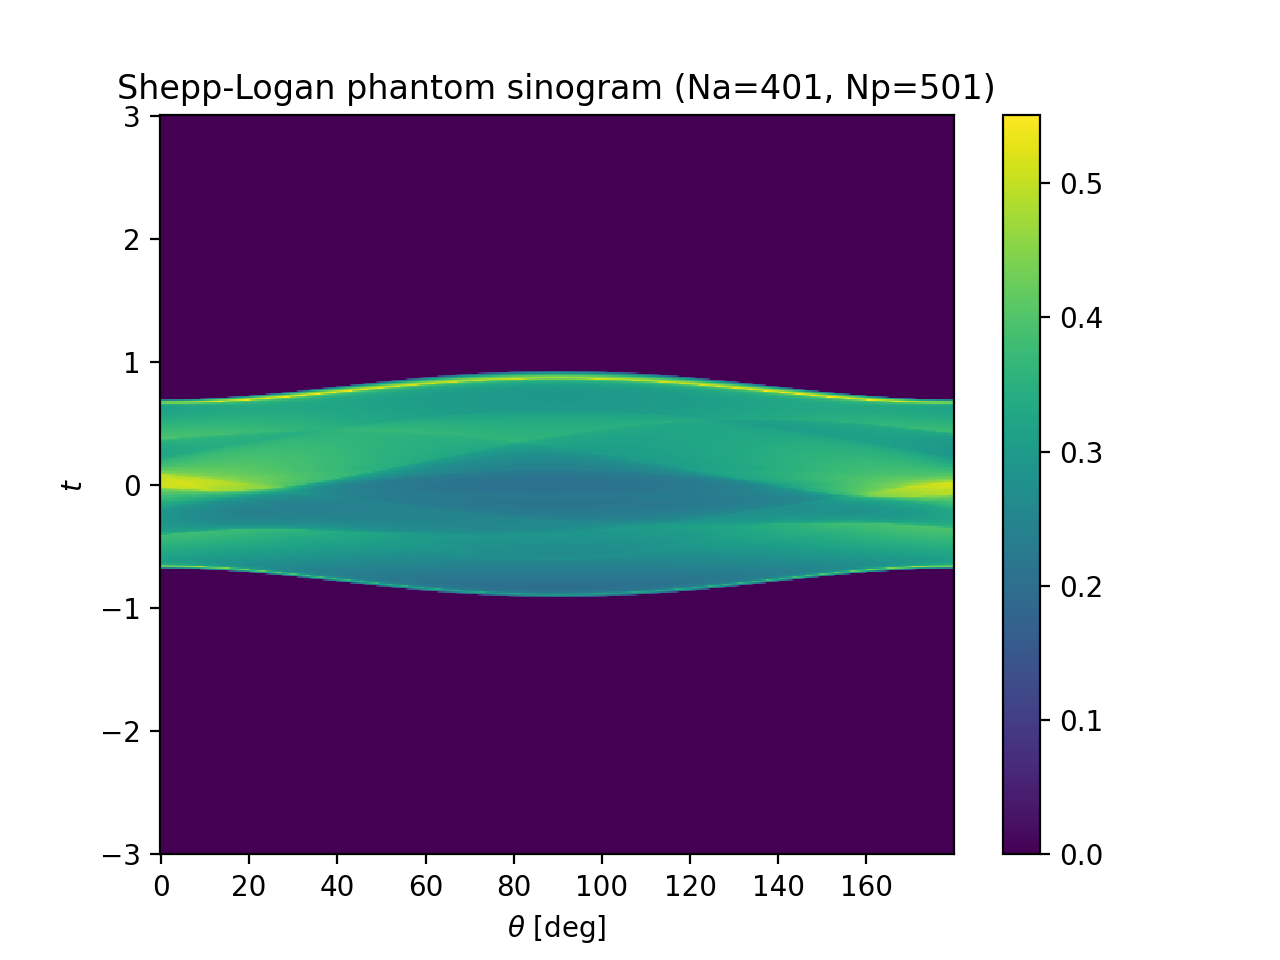

In [8]:
fig, ax = plt.subplots()
im = grid_y.plot(ax, y, aspect='auto')
fig.colorbar(im)
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'$t$')
ax.set_title(f'Shepp-Logan phantom sinogram (Na={Na}, Np={Np})');

In [9]:
grid_y.shape

(501, 401)

In [10]:
grid_y.axis_x.N

401

In [11]:
p_hat = fbp(grid, grid_y, y)

<IPython.core.display.Javascript object>


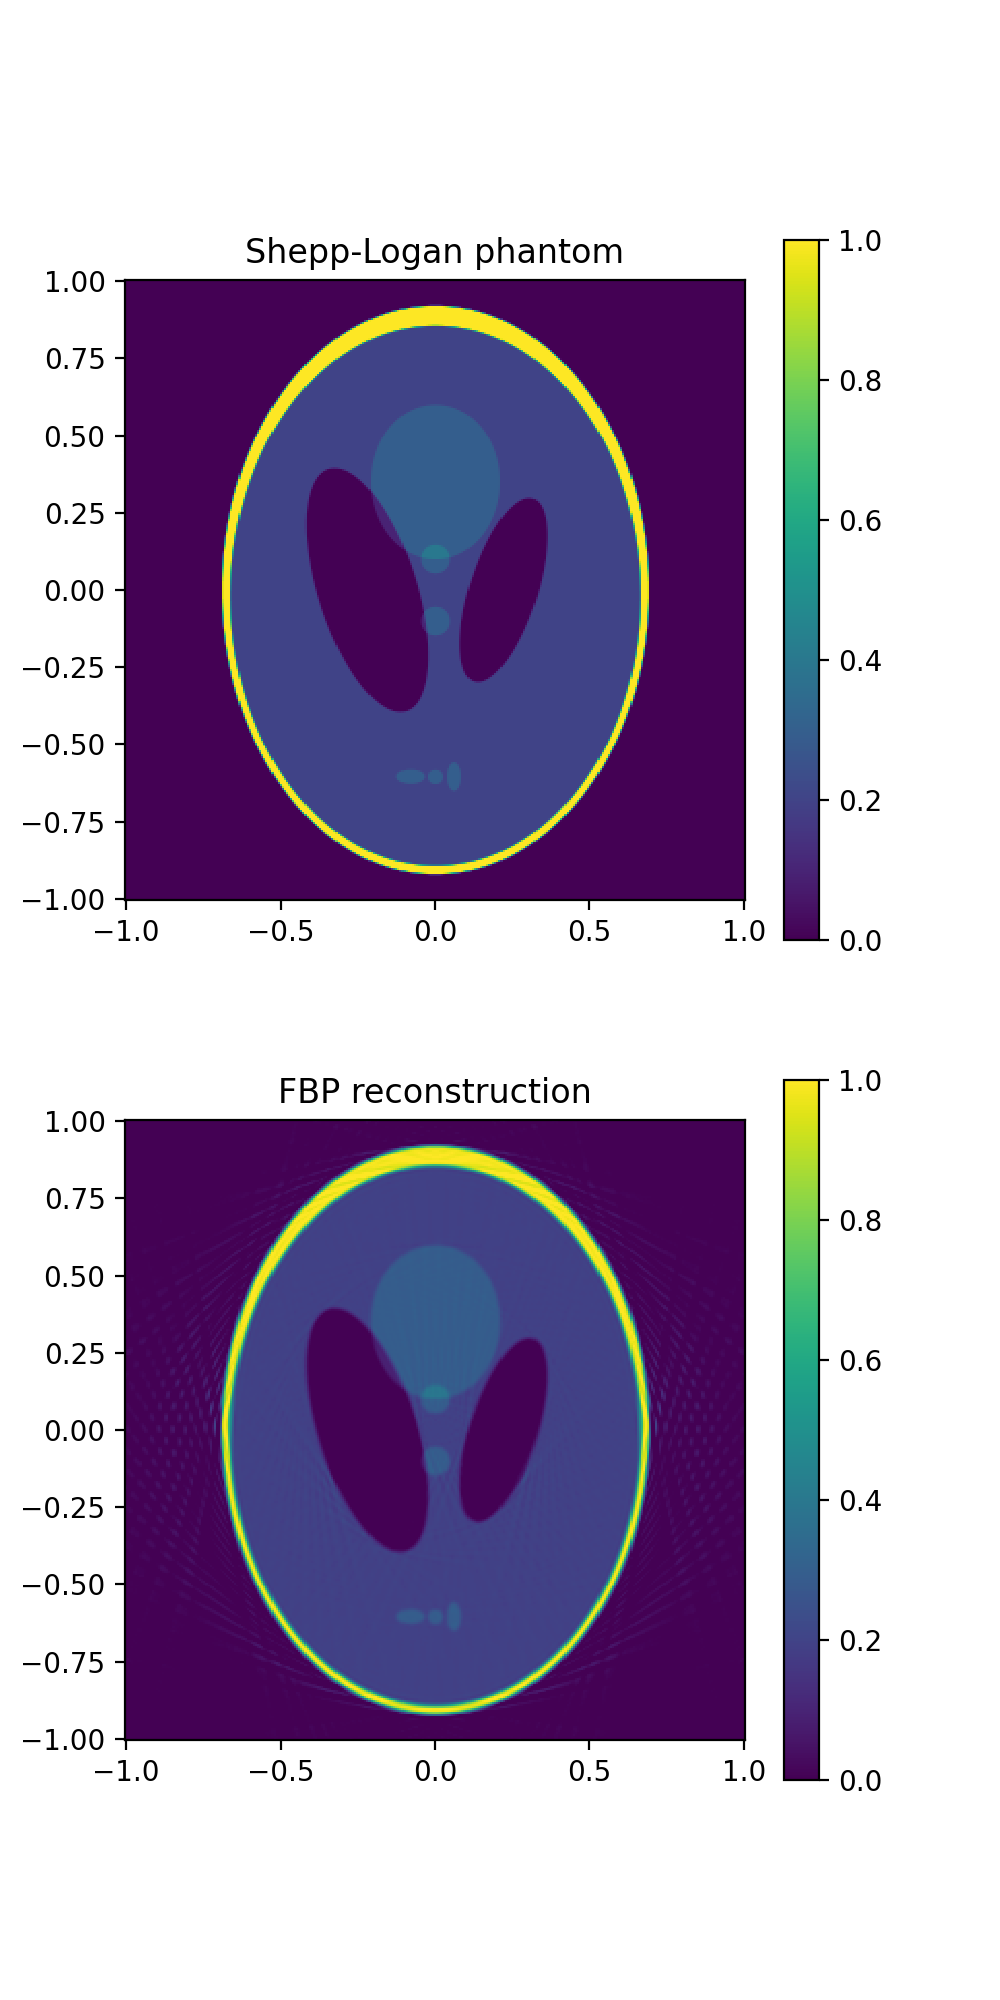

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(5, 10))
im = grid.plot(ax[0], p.raster(grid), vmin=0, vmax=1)
ax[0].set_title('Shepp-Logan phantom')
fig.colorbar(im, ax=ax[0])
im = grid.plot(ax[1], p_hat, vmin=0, vmax=1)
ax[1].set_title('FBP reconstruction')
fig.colorbar(im, ax=ax[1]);